In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
ds0 = xr.open_dataset('../data/vdk_flux_calc_test.nc')
ds1 = xr.open_dataset('../data/RBSP-ECT_FB_precip.nc')

In [19]:
ds1['RBSP_flux_scaled']

<xarray.DataArray 'RBSP_flux_scaled' (time: 6154, lshell: 36, energy: 120, percentiles: 4)>
[106341120 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 2013-01-01T05:47:30.000004608 ... 2019...
  * lshell       (lshell) float32 2.5 2.6 2.7 2.8 2.9 ... 5.6 5.7 5.8 5.9 6.0
  * energy       (energy) float32 1.0 1.074 1.153 ... 4.041e+03 4.338e+03 5e+03
  * percentiles  (percentiles) float32 100.0 75.0 50.0 25.0
Attributes:
    description:  RBSP flux scaled to FB-RBSP ratios
    units:        cm-2 s-1 sr-1 keV-1

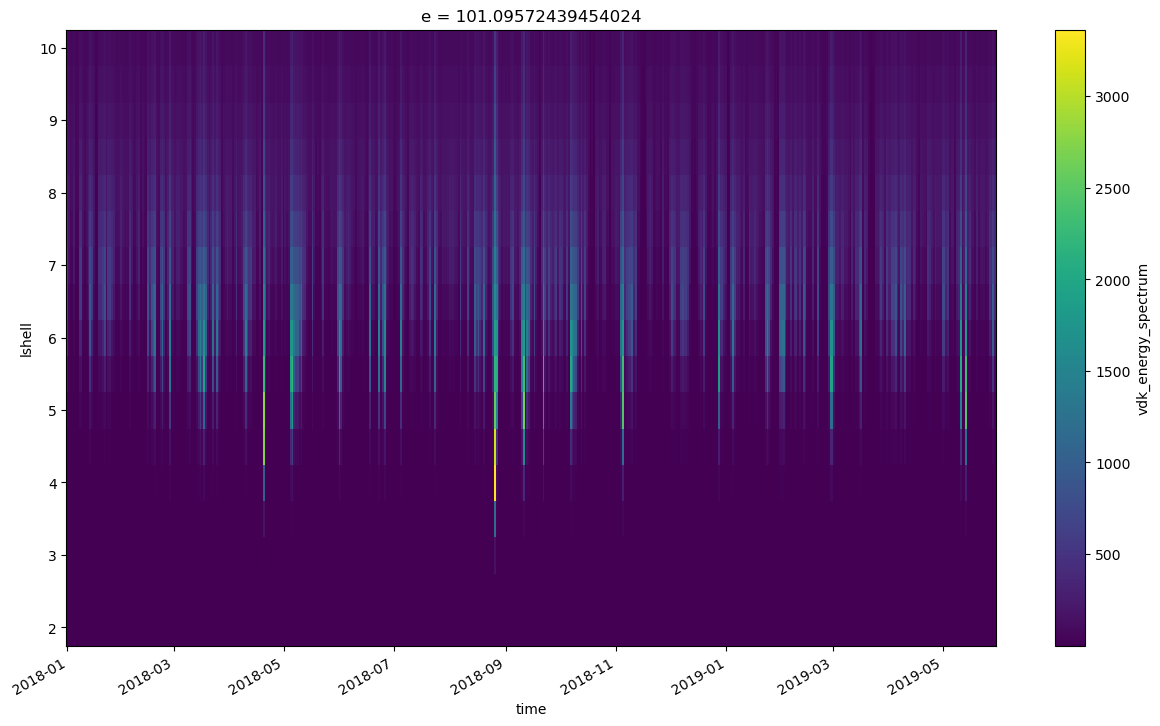

In [4]:
plt.figure(figsize=(15,8))
ds0['vdk_energy_spectrum'].sel(e=1e2, method='nearest').sel(time=slice('2018-01-01','2019-05-30')).plot(x='time')
plt.show()

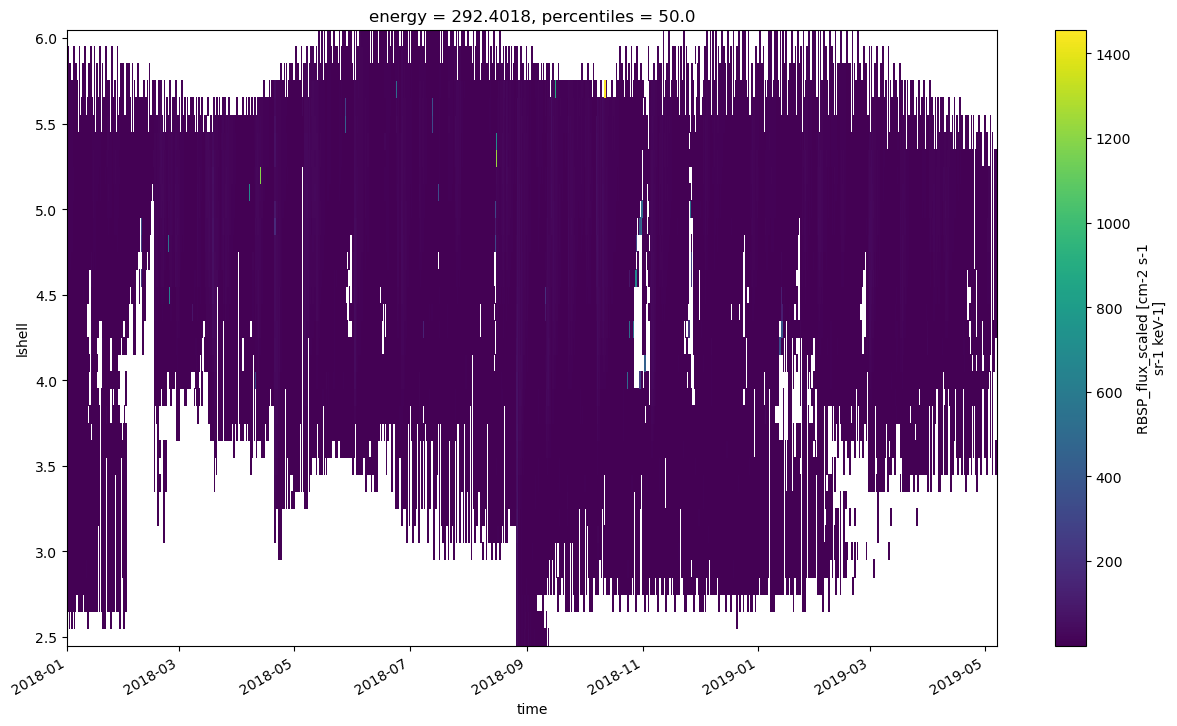

In [25]:
plt.figure(figsize=(15,8))
ds1['RBSP_flux_scaled'].sel(energy=3e2, method='nearest').sel(time=slice('2018-01-01','2019-05-30')).sel(percentiles=50).plot(x='time')
plt.show()

In [21]:
def plt_flux(energy, lshell):

    plt.figure(figsize=(15,8))

    ds0['vdk_energy_spectrum']\
        .sel(e=energy, lshell=lshell, method='nearest')\
        .sel(time=slice('2018-01-01','2019-05-30'))\
        .plot(label = 'VdK', marker='o', linestyle='none', color='g')

    ds1['RBSP_flux_scaled'].sel(percentiles=50)\
        .sel(energy=energy, lshell=lshell, method='nearest')\
        .sel(time=slice('2018-01-01','2019-05-30'))\
        .plot(label = 'RBSP_flux_fit', marker='+', linestyle='none', color='b')

    ax = plt.gca()
    ax.set_yscale('log')
    
    plt.legend()
    
    plt.show()
    return

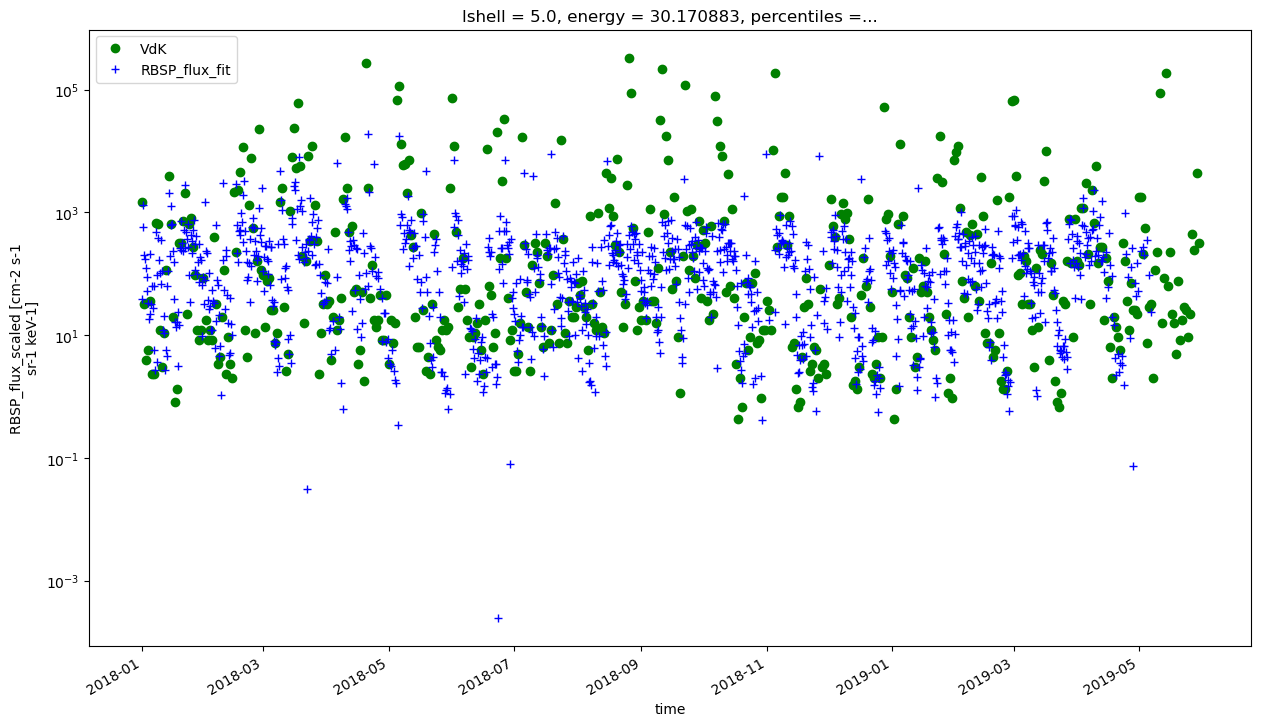

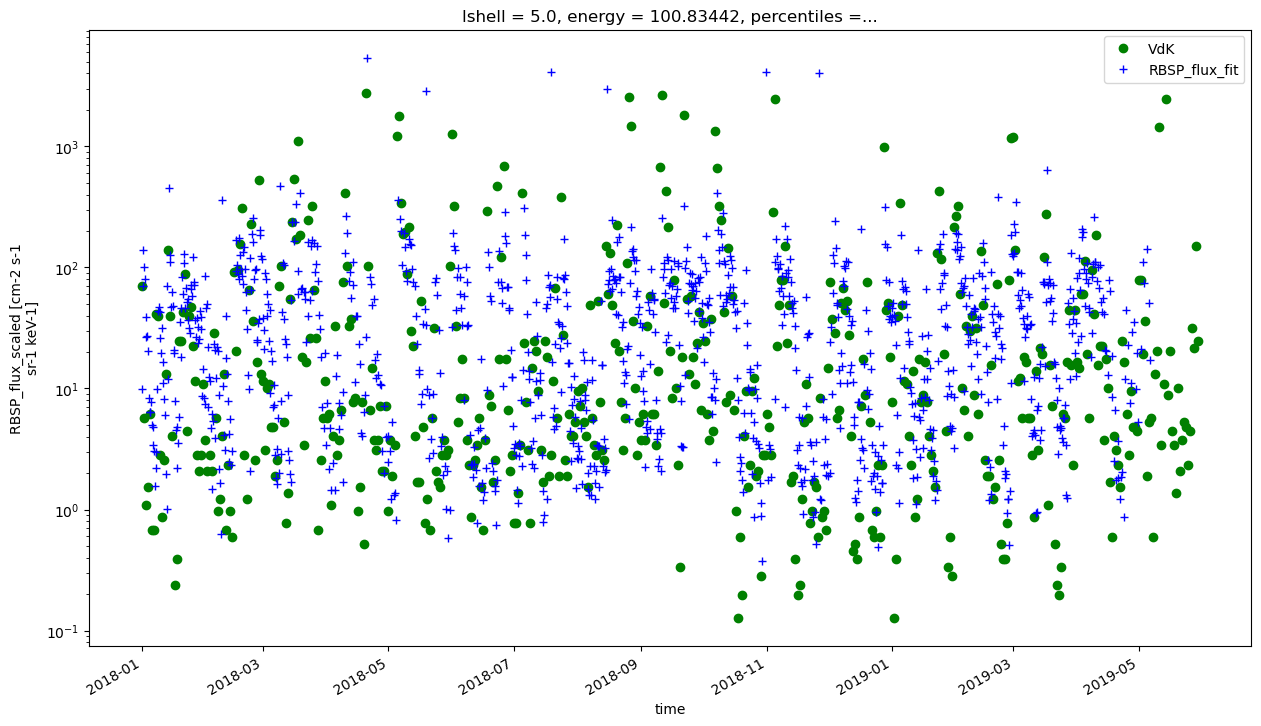

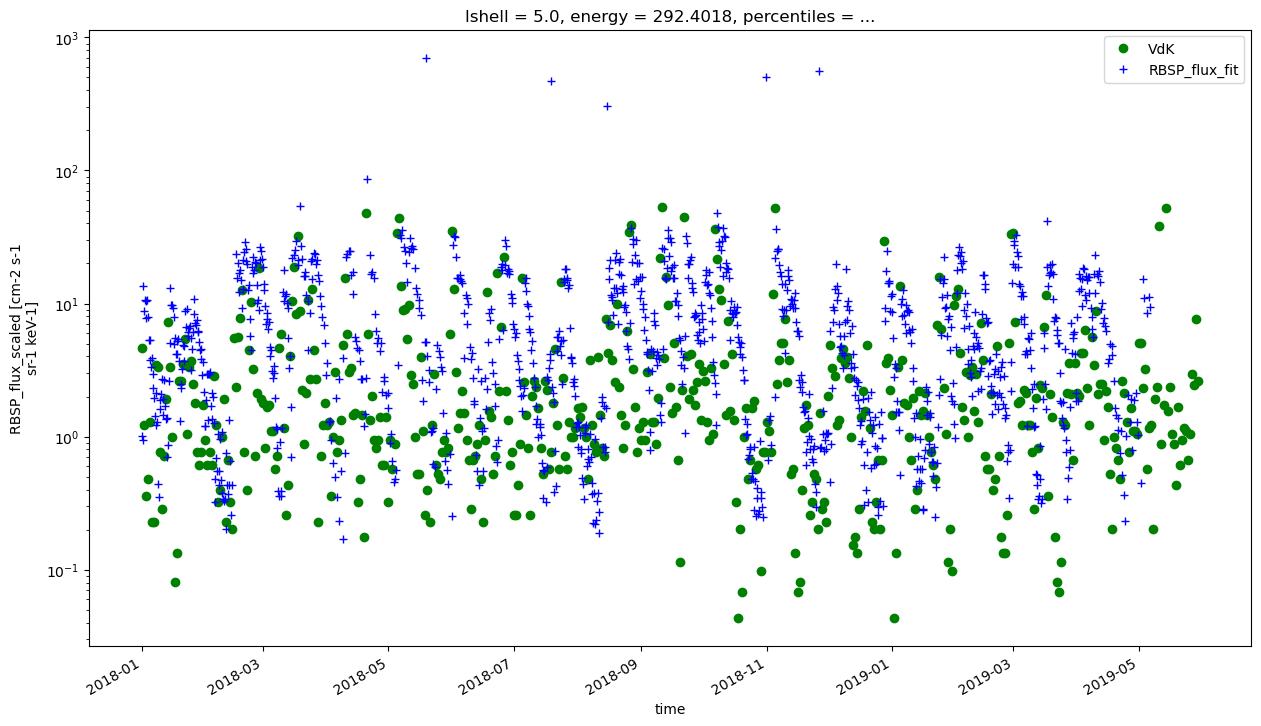

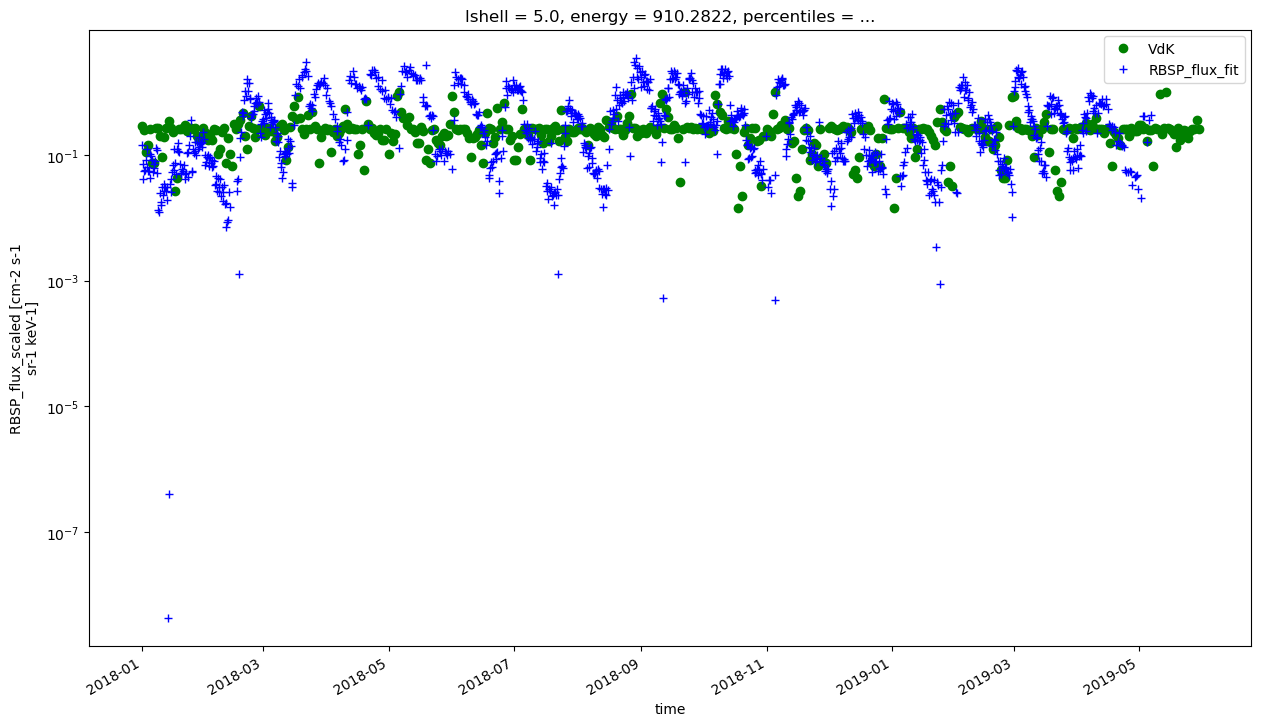

In [22]:
plt_flux(30,5)
plt_flux(100,5)
plt_flux(300,5)
plt_flux(900,5)

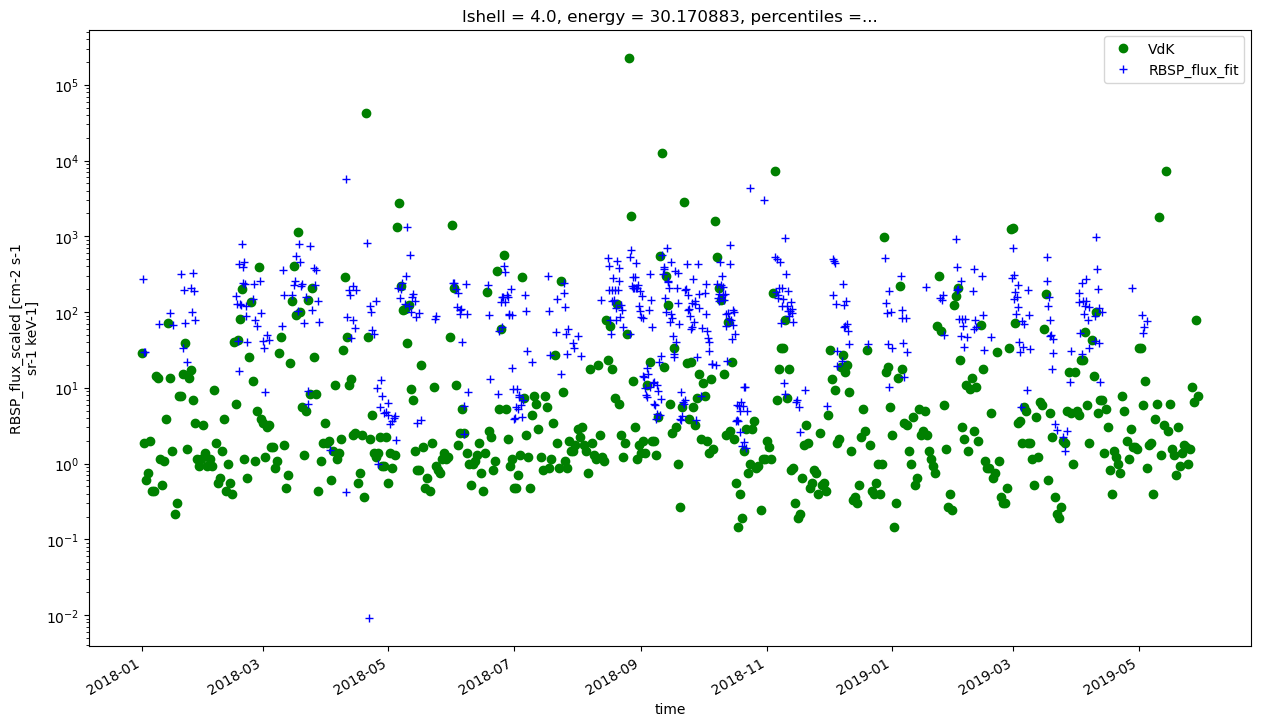

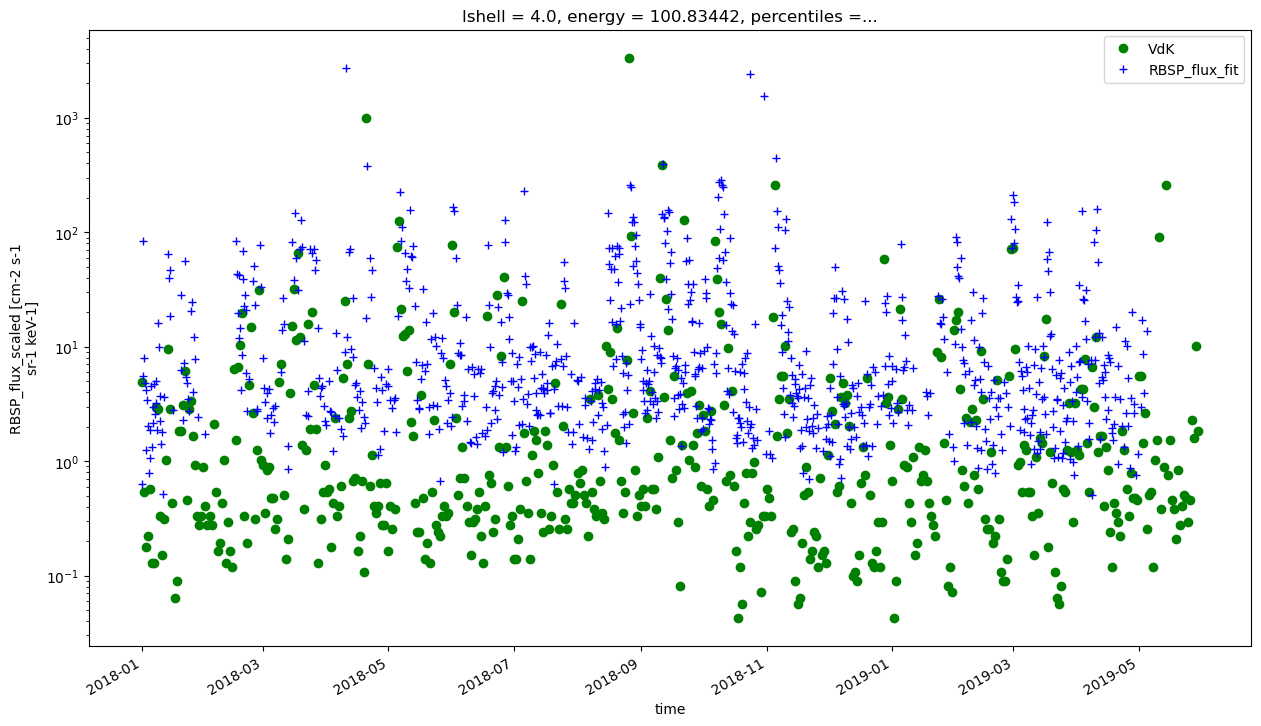

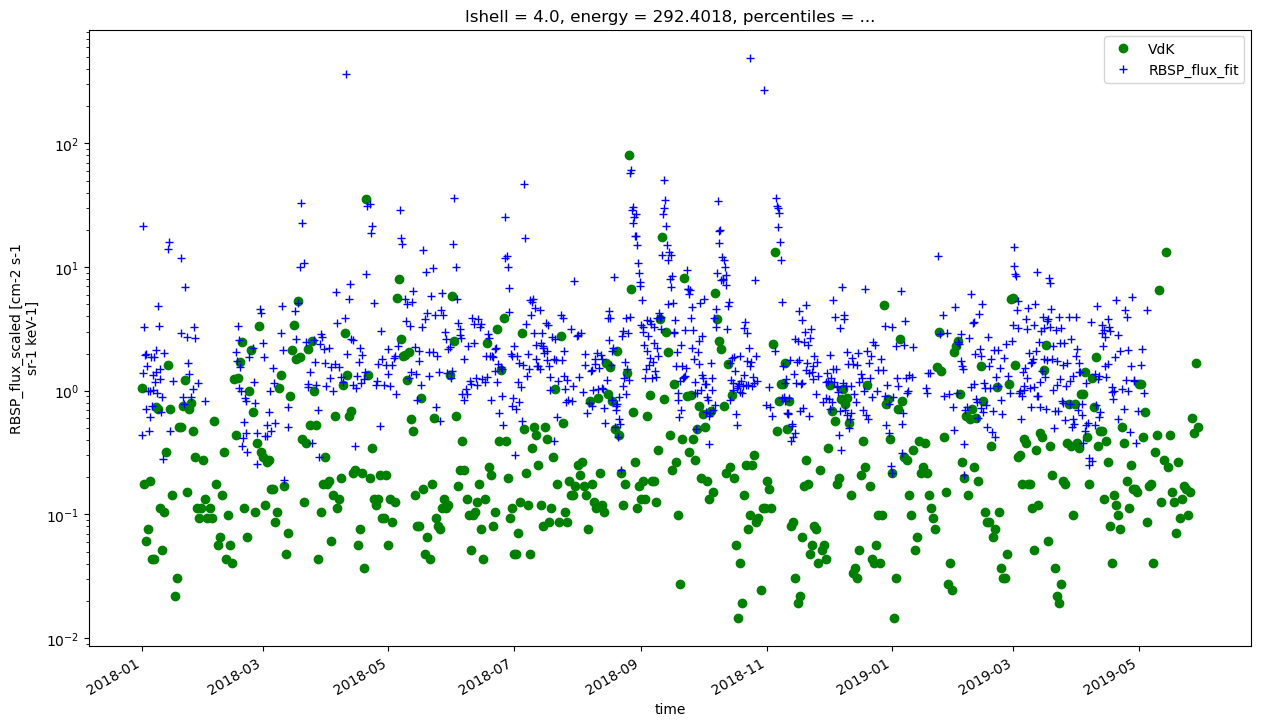

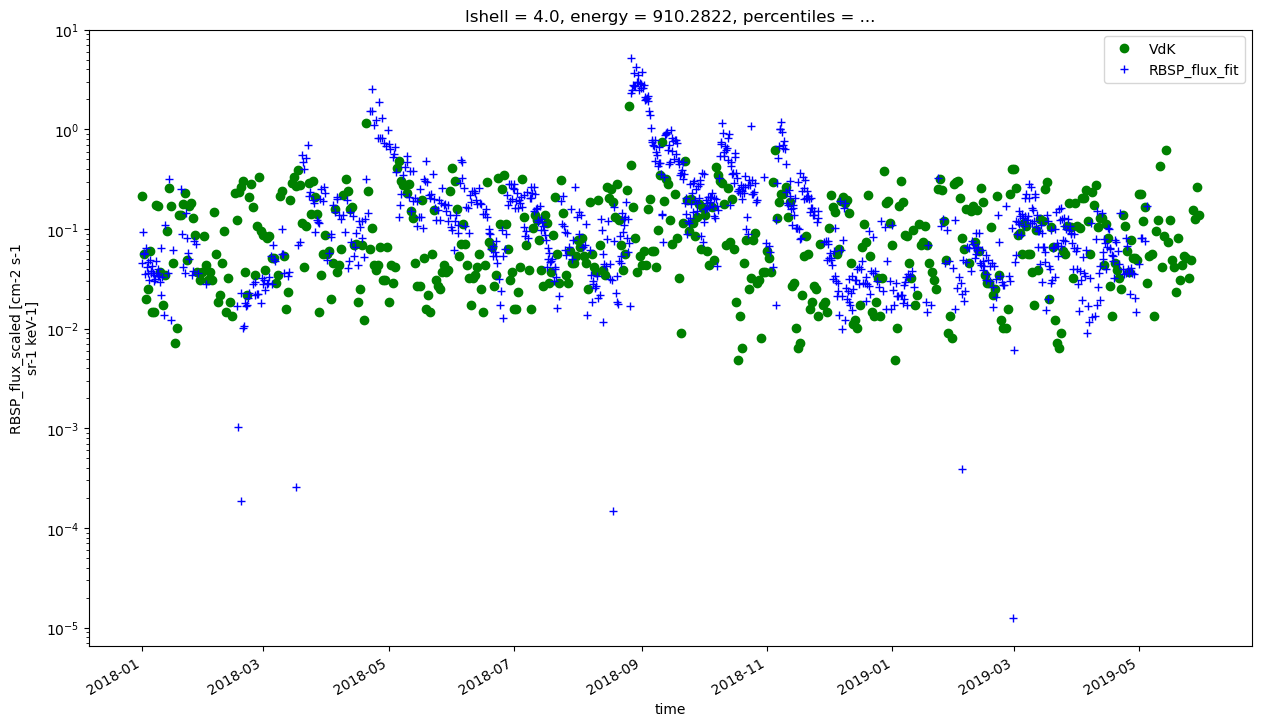

In [24]:
plt_flux(30,4)
plt_flux(100,4)
plt_flux(300,4)
plt_flux(900,4)

In [26]:
def plot_spectrum(date, lshell):
    ds3 = ds1.sel(lshell=lshell, time=date, method='nearest')

    plt.figure(figsize=(12,6))
    ds1['RBSP_flux_scaled'].sel(percentiles=50)
    ds3.plot.scatter('energy','RBSP_flux_fit', label = 'RBSP_flux_fit')
    ds3.plot.scatter('RBSP_energies','RBSP_flux', label = 'RBSP_flux')
    ds3.sel(percentiles=50).plot.scatter('energy','RBSP_flux_scaled', label = 'RBSP_flux_scaled')

    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('lshell:'+str(ds3.lshell.values))

    plt.legend()

    plt.show()

    return

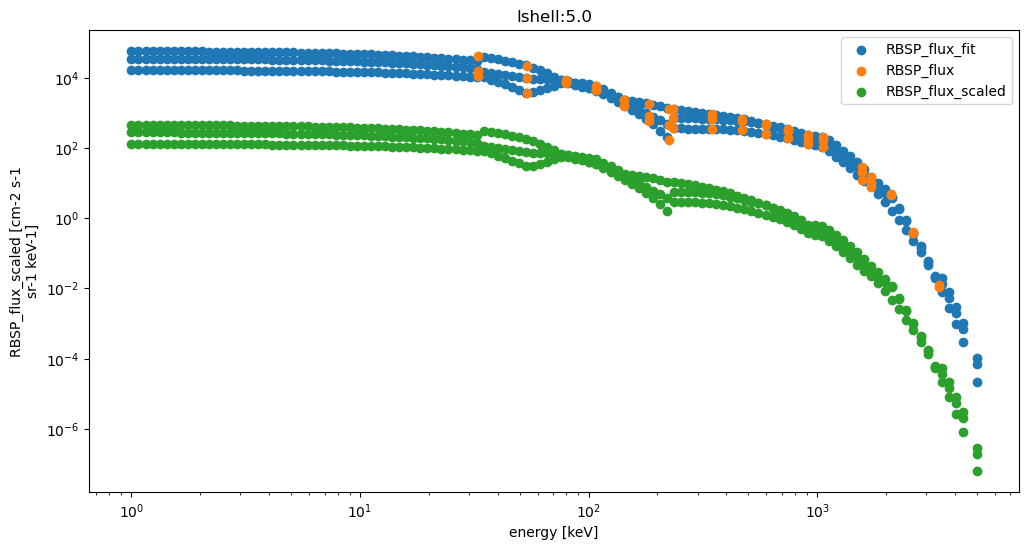

In [27]:
plot_spectrum('2019-01-01', 5.0)

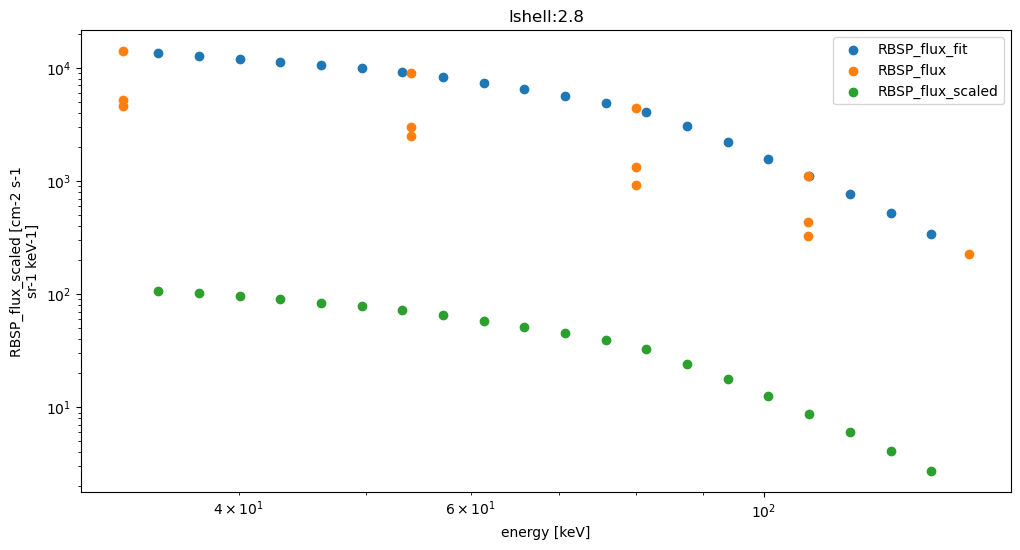

In [28]:
plot_spectrum('2019-01-01', 2.8)